In [2]:
from google.colab import files
uploaded = files.upload()

Saving patient.csv to patient.csv


**Columns**

  - **id** the ID of the patient (n-th confirmed patient)

  - **sex** the sex of the patient

  - **birth_year** the birth year of the patient

  - **country** the country of the patient

  - **region** the region of the patient

  - **group** the collective infection

  - **infection_reason** the reason of infection

  - **infection_order** the order of infection

  - **infected_by** the ID of who has infected the patient

  - **contact_number** the number of contacts with people

  - **confirmed_date** the date of confirmation

  - **released_date** the date of discharge

  - **deceased_date** the date of decease

  - **state** isolated / released / deceased


**Import Library**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
import io
data = pd.read_csv(io.BytesIO(uploaded['patient.csv']))

**EDA**

In [5]:
data.head(5)  # Print fisr five data.

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released


In [6]:
data.info()   ##.info() function is used to get a concise summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5328 entries, 0 to 5327
Data columns (total 14 columns):
id                  5328 non-null int64
sex                 383 non-null object
birth_year          370 non-null float64
country             5328 non-null object
region              371 non-null object
group               81 non-null object
infection_reason    140 non-null object
infection_order     35 non-null float64
infected_by         70 non-null float64
contact_number      47 non-null float64
confirmed_date      5328 non-null object
released_date       32 non-null object
deceased_date       20 non-null object
state               5328 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 582.9+ KB


In [7]:
data.describe()  #checking statistic summary & it will show you only for "Numerical Data" not "Categorial"

,id,birth_year,infection_order,infected_by,contact_number
count,5328.000000,370.000000,35.000000,70.000000,47.000000
mean,2664.500000,1973.589189,2.285714,379.000000,72.978723
std,1538.205448,17.560546,1.405272,540.247528,188.155288
min,1.000000,1932.000000,1.000000,3.000000,0.000000
25%,1332.750000,1960.000000,1.000000,29.250000,2.500000
50%,2664.500000,1974.000000,2.000000,126.000000,16.000000
75%,3996.250000,1987.750000,3.000000,563.250000,46.000000
max,5328.000000,2018.000000,6.000000,2621.000000,1160.000000


In [0]:
data.duplicated().sum()  #Removing duplicates if any
data.drop_duplicates(inplace=True)

In [9]:
data.isnull().sum()  #checking number of NUll Values in an Data Set

id                     0
sex                 4945
birth_year          4958
country                0
region              4957
group               5247
infection_reason    5188
infection_order     5293
infected_by         5258
contact_number      5281
confirmed_date         0
released_date       5296
deceased_date       5308
state                  0
dtype: int64

In [10]:
print(data.shape)   #checking shape of dataset

(5328, 14)


In [11]:
data.columns  # Print columns

Index(['id', 'sex', 'birth_year', 'country', 'region', 'group',
       'infection_reason', 'infection_order', 'infected_by', 'contact_number',
       'confirmed_date', 'released_date', 'deceased_date', 'state'],
      dtype='object')

In [12]:
data['sex'].value_counts()  # Count all male and female data.

female    194
male      189
Name: sex, dtype: int64

In [13]:
data.sex = data.sex.apply(lambda X : 0 if X == 'female' else 1) #applying lambda function to change sex Female & Male to 0 & 1
data.head(5)

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,0,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,1,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,1,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,1,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,1,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released


In [14]:
data.describe().T   #checking statistic summary & it will show you only for "Numerical Data" not "Categorial"

,count,mean,std,min,25%,50%,75%,max
id,5328.0,2664.500000,1538.205448,1.0,1332.75,2664.5,3996.25,5328.0
sex,5328.0,0.963589,0.187329,0.0,1.00,1.0,1.00,1.0
birth_year,370.0,1973.589189,17.560546,1932.0,1960.00,1974.0,1987.75,2018.0
infection_order,35.0,2.285714,1.405272,1.0,1.00,2.0,3.00,6.0
infected_by,70.0,379.000000,540.247528,3.0,29.25,126.0,563.25,2621.0
contact_number,47.0,72.978723,188.155288,0.0,2.50,16.0,46.00,1160.0


**Data Visualization**

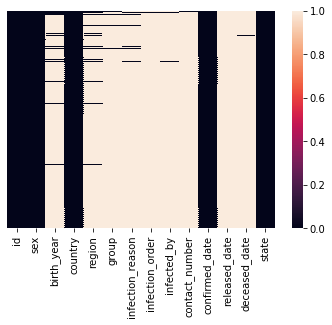

In [15]:
sns.heatmap(data.isnull(), yticklabels = False)  #checking NULl Values via graph,where you can find yellow colour which means that column contains NUll values

Text(0.5, 1.0, 'Regions affected Overall')

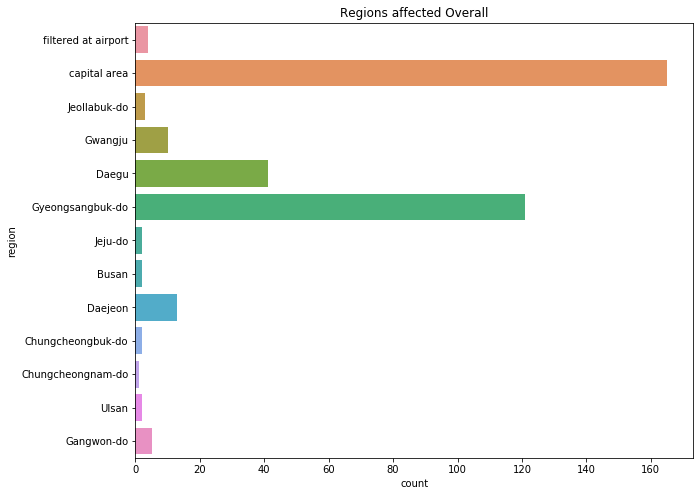

In [16]:
# sns.set(rc={'figure.figsize':(10,8)})

plt.figure(figsize=(10,8))
sns.countplot(y=data['region'],).set_title('Regions affected Overall') # Ploting graph which regions maximum number of affected peole

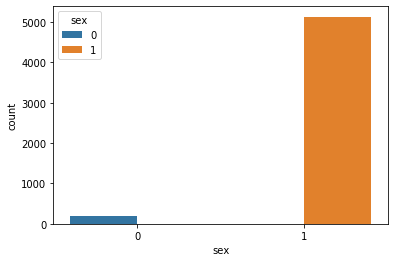

In [17]:
sns.countplot(x='sex',data=data, hue='sex');  # sex Female & Male to 0 & 1

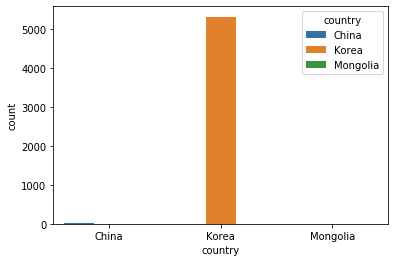

In [18]:
sns.countplot(x='country',data=data, hue='country');  # Ploting Graph which Country maximum number of affected people. 

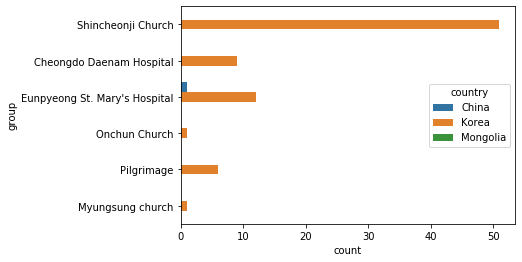

In [19]:
sns.countplot(y='group',data=data, hue='country');  # Ploting Graph which area maximum number of affected people in country. 

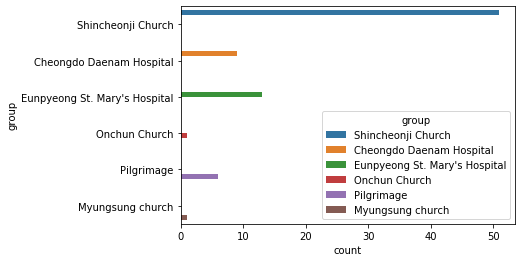

In [20]:
sns.countplot(y='group',data=data, hue='group');  

**confirmed patients trend**

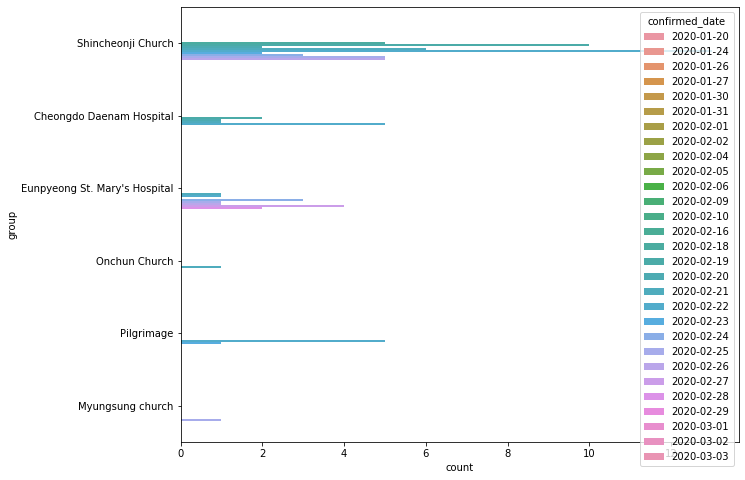

In [24]:
plt.figure(figsize=(10,8))
sns.countplot(y='group',data=data, hue='confirmed_date');  

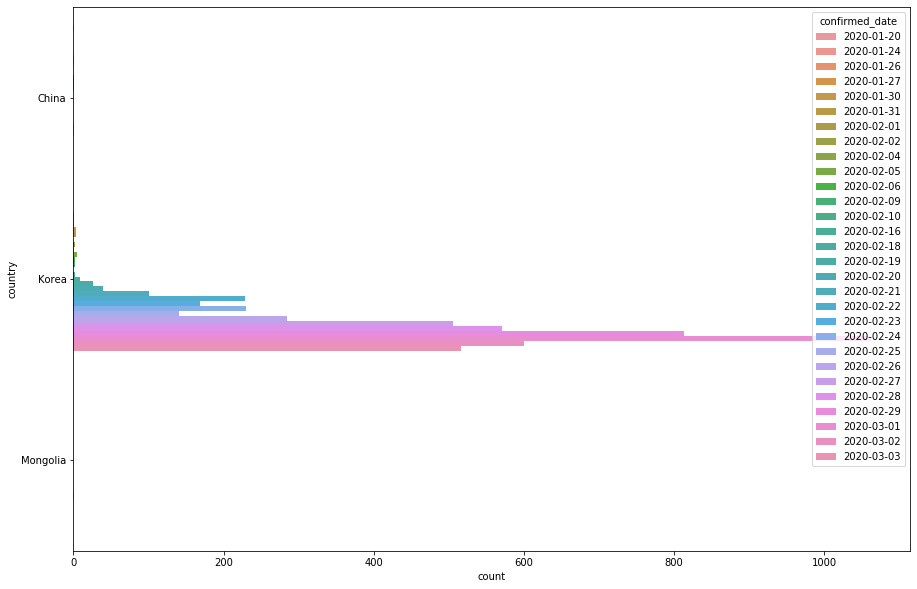

In [26]:
plt.figure(figsize=(15,10))
sns.countplot(y='country',data=data, hue='confirmed_date');
# sns.countplot(y=data['confirmed_date'].loc[(data['country']=="Korea")],).set_title('Confirmed dates in Korea')

Text(0.5, 1.0, 'Confirmed dates in Korea')

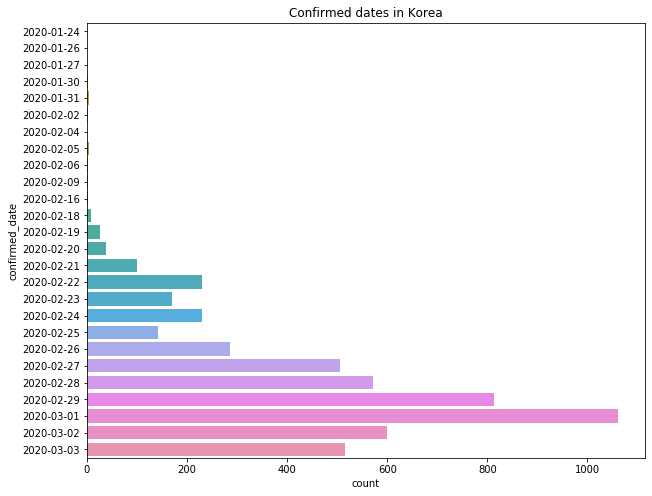

In [27]:
plt.figure(figsize=(10,8))
sns.countplot(y=data['confirmed_date'].loc[(data['country']=="Korea")],).set_title('Confirmed dates in Korea')  
# ploting the graph confirmed date of the human infected or not in the Korea Country

Text(0.5, 1.0, 'Confirmed dates in China')

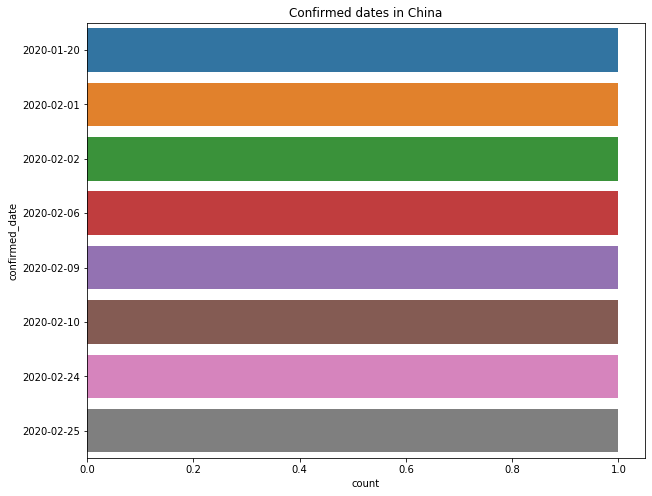

In [28]:
plt.figure(figsize=(10,8))
sns.countplot(y=data['confirmed_date'].loc[(data['country']=="China")],).set_title('Confirmed dates in China')
# ploting the graph confirmed date of the human infected or not in the China Country

Text(0.5, 1.0, 'Confirmed dates in Mongloia')

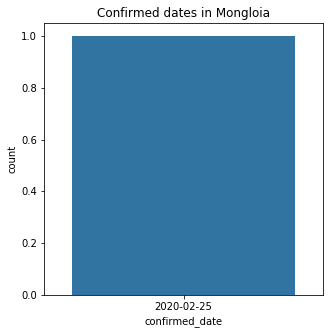

In [29]:
plt.figure(figsize=(5,5))
sns.countplot(x=data['confirmed_date'].loc[(data['country']=="Mongolia")],).set_title('Confirmed dates in Mongloia')
# ploting the graph confirmed date of the human infected or not in the Mongloia Country

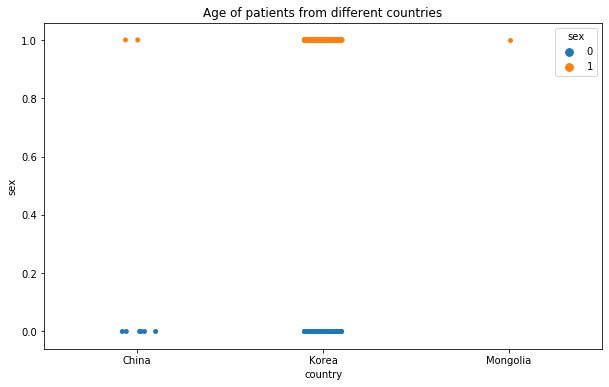

In [30]:
plt.figure(figsize=(10,6))
sns.stripplot(x=data.country, y=data.sex, hue=data.sex)
plt.title("Age of patients from different countries")
plt.show()

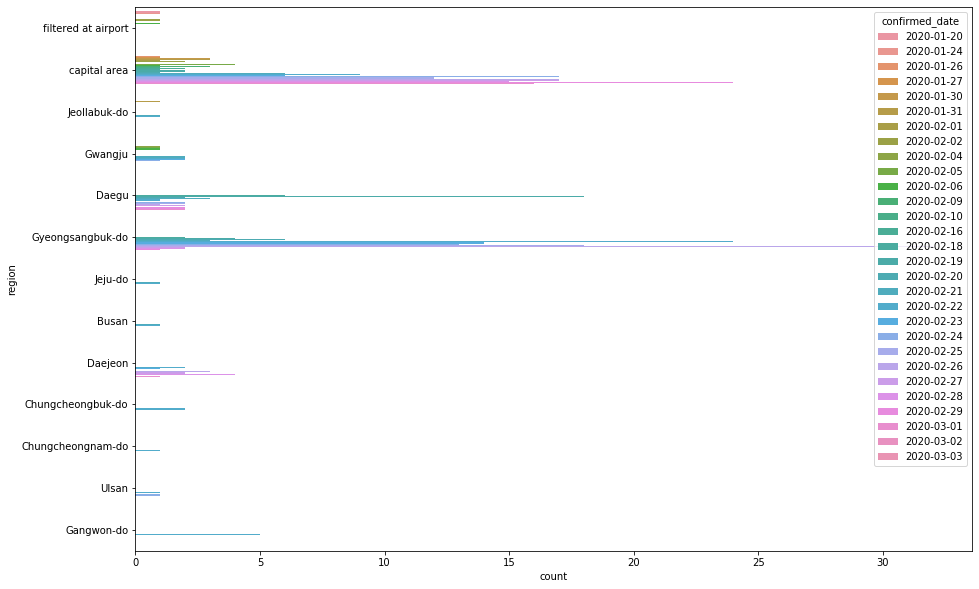

In [31]:
plt.figure(figsize=(15,10))
sns.countplot(y='region',data=data, hue='confirmed_date');

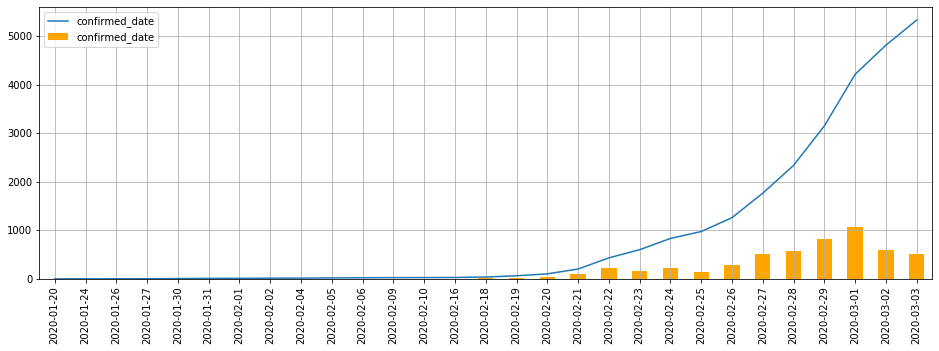

In [32]:
confirmed_patients_series = data['confirmed_date'].value_counts().sort_index()

confirmed_patients_series.cumsum().plot(legend='accumulated')
confirmed_patients_series.plot(kind='bar', color='orange', legend='daily', figsize=(16, 5), grid=True)

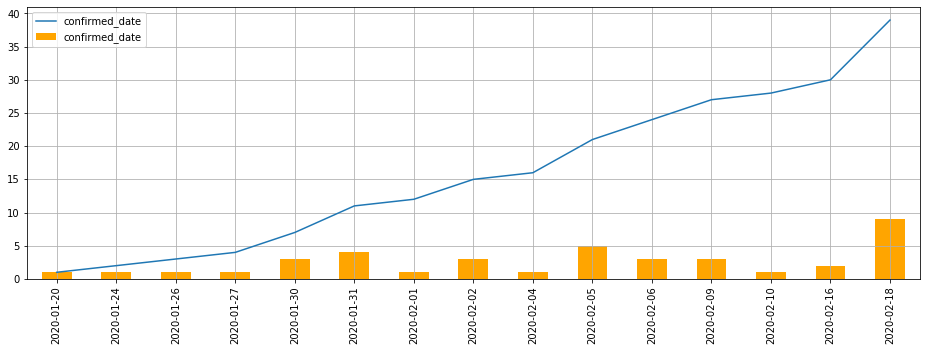

In [33]:
# before no.31 patient confirmed
limit_series = confirmed_patients_series[:data[data['id'] == 31]['confirmed_date'].values[0]]
limit_series.cumsum().plot(legend='accumulated')
limit_series.plot(kind='bar', color='orange', legend='daily', figsize=(16, 5), grid=True)

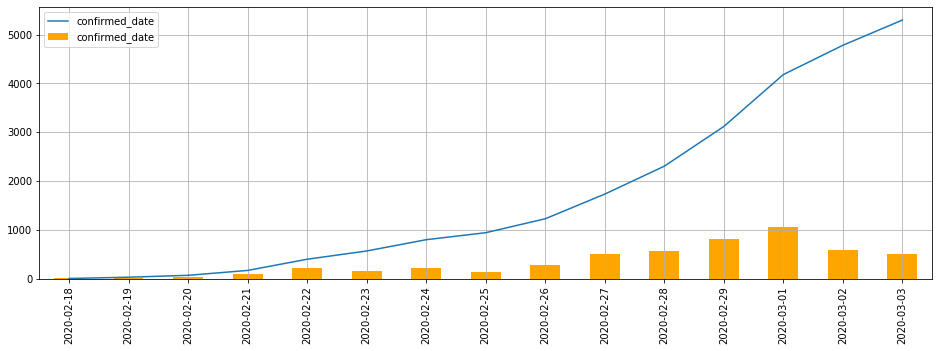

In [34]:
# after no.31 patient confirmed
limit_series = confirmed_patients_series[data[data['id'] == 31]['confirmed_date'].values[0]:]
limit_series.cumsum().plot(legend='accumulated')
limit_series.plot(kind='bar', color='orange', legend='daily', figsize=(16, 5), grid=True)

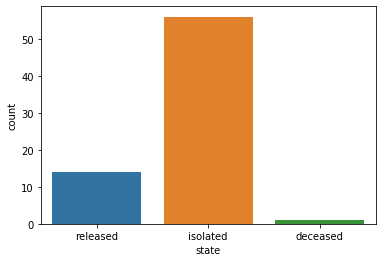

In [35]:
sns.countplot(x=data['state'].loc[(data['infection_reason']=='contact with patient')])

In [36]:
!pip install WordCloud
from wordcloud import WordCloud

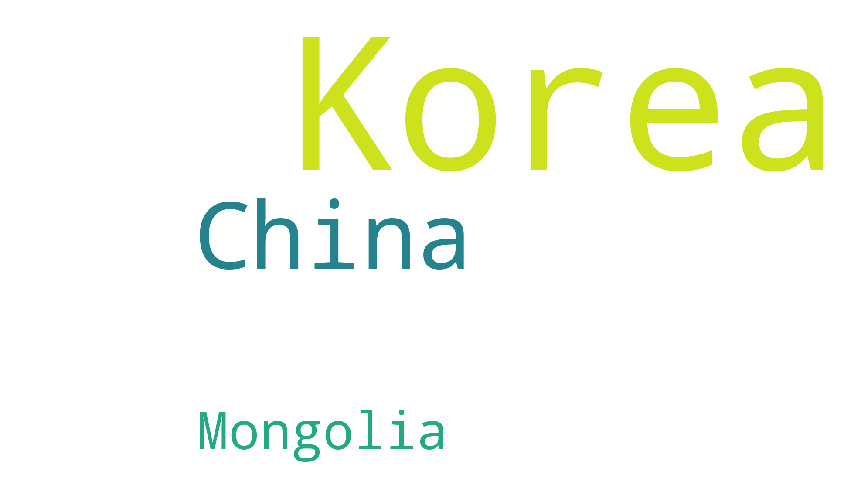

In [37]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(15,15)) #Using WordCloud to check most frequently country suffered from "Coronavirus" 
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(data.country))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('country.png')
plt.show()

**Great Job Shivan!**